<a href="https://colab.research.google.com/github/5223455/Zetaaaa/blob/main/newspaper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np


In [2]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
file_name=list(uploaded.keys())[0]
newspaper=pd.read_csv(file_name)

Saving NewspaperData.csv to NewspaperData.csv


In [3]:
newspaper.shape

(34, 3)

In [4]:
newspaper.isnull().sum()

,0
Newspaper,0
daily,0
sunday,0


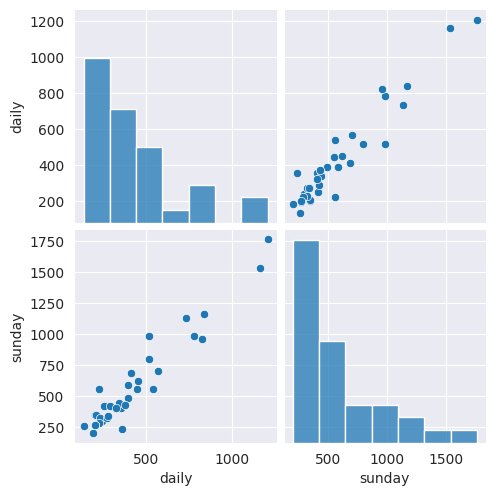

In [5]:
sns.set_style(style='darkgrid')
sns.pairplot(newspaper)

In [7]:
import statsmodels.formula.api as smf
model = smf.ols('daily ~ sunday', data=newspaper).fit()

In [8]:
model.params

,0
Intercept,25.832125
sunday,0.685265


In [12]:
print(model.tvalues,'\n',model.pvalues)


Intercept     1.022773
sunday       18.934840
dtype: float64 
 Intercept    3.140853e-01
sunday       6.016802e-19
dtype: float64


In [13]:
(model.rsquared,model.rsquared_adj)

(0.9180596895873295, 0.9154990548869336)

In [14]:
ml_v=smf.ols('daily~sunday',data=newspaper).fit()
print(ml_v.tvalues,'\n',ml_v.pvalues)

Intercept     1.022773
sunday       18.934840
dtype: float64 
 Intercept    3.140853e-01
sunday       6.016802e-19
dtype: float64


In [16]:
(ml_v.rsquared,ml_v.rsquared_adj)

(0.9180596895873295, 0.9154990548869336)

<Axes: xlabel='sunday', ylabel='daily'>

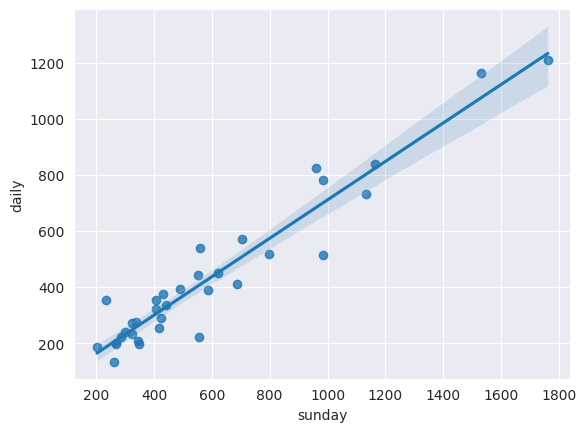

In [17]:
import seaborn  as sns
sns.regplot(x='sunday',y='daily',data=newspaper)

<ipython-input-18-801c14df8ff0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(newspaper['daily'])
<ipython-input-18-801c14df8ff0>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(newspaper['sunday'])


<Axes: xlabel='sunday', ylabel='Density'>

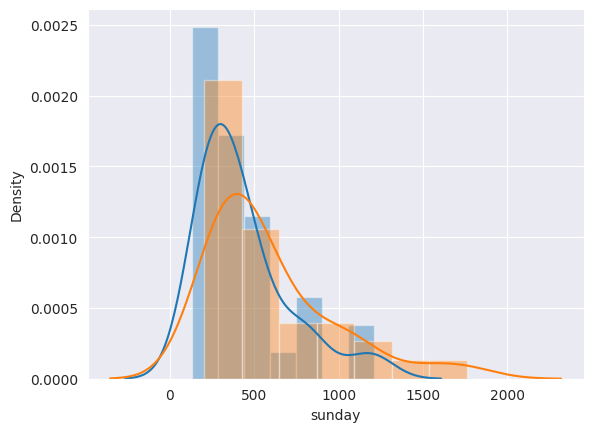

In [18]:
import seaborn as sns
sns.distplot(newspaper['daily'])
import seaborn as sns
sns.distplot(newspaper['sunday'])

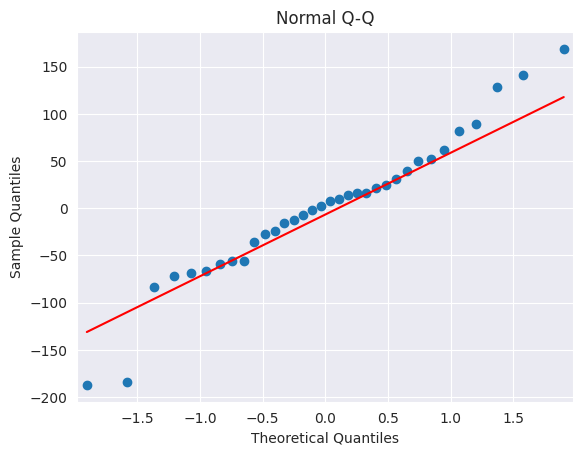

In [19]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title('Normal Q-Q')
plt.show()

In [20]:
list(np.where(model.resid>10))

[array([ 0,  2,  4, 12, 13, 14, 16, 17, 19, 21, 27, 28, 29, 32, 33])]

In [21]:
def get_std_resid(vals):
  return (vals-np.mean(vals))/np.std()

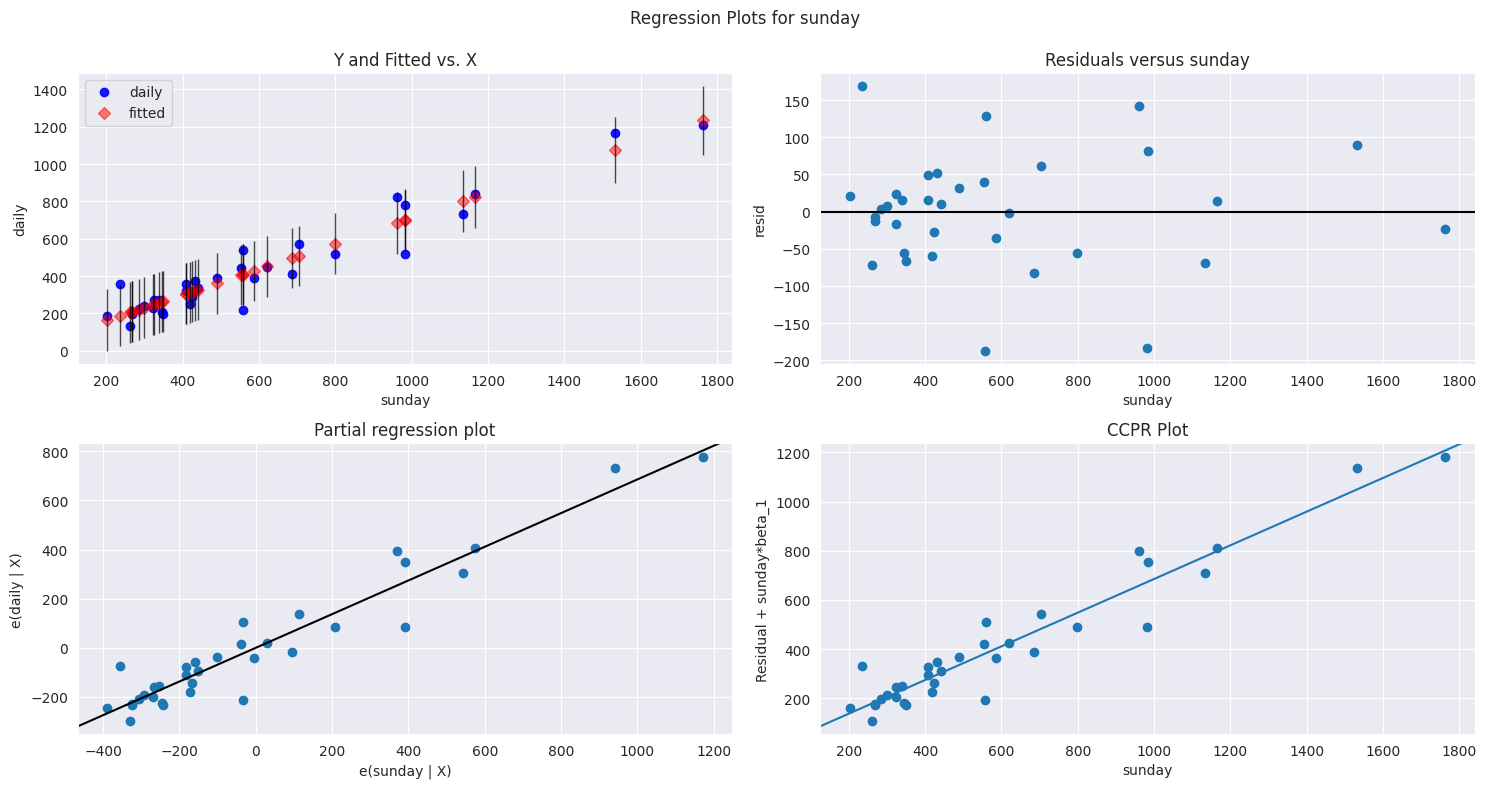

In [23]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'sunday', fig=fig)
plt.show()

In [24]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

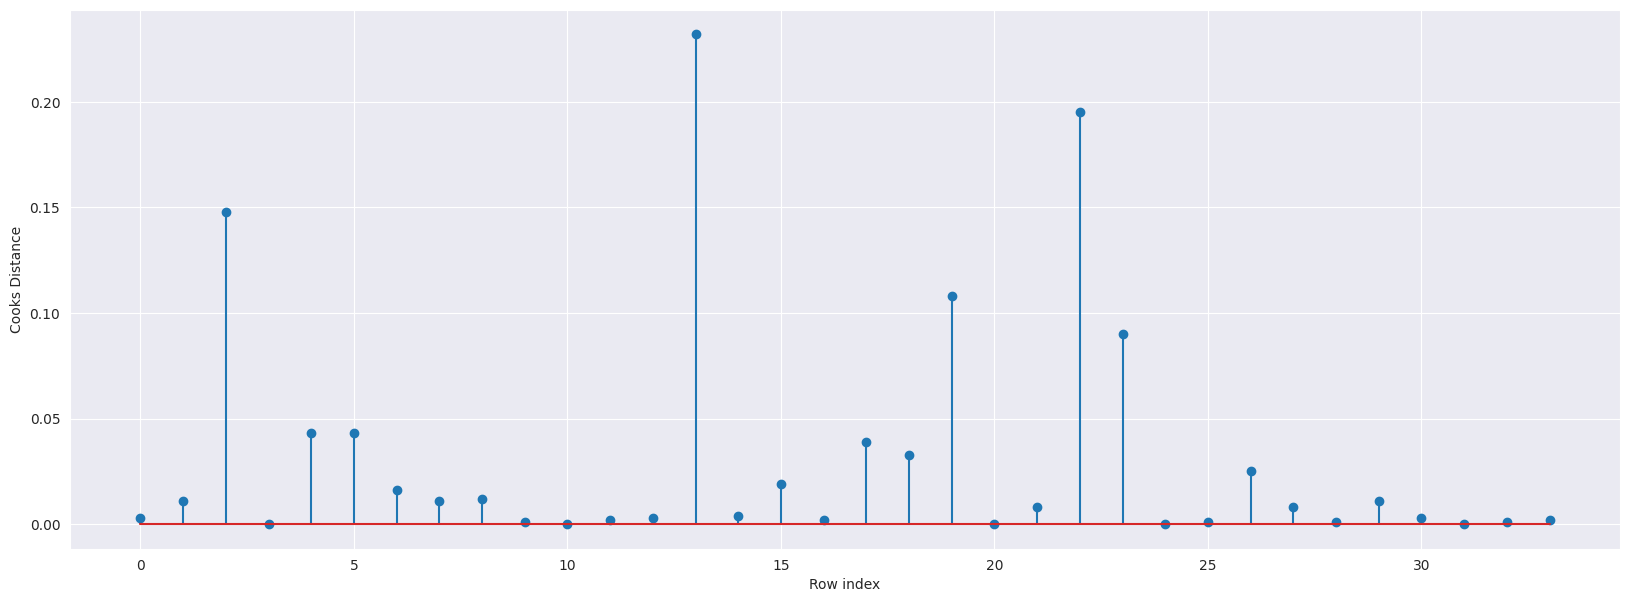

In [33]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(newspaper)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

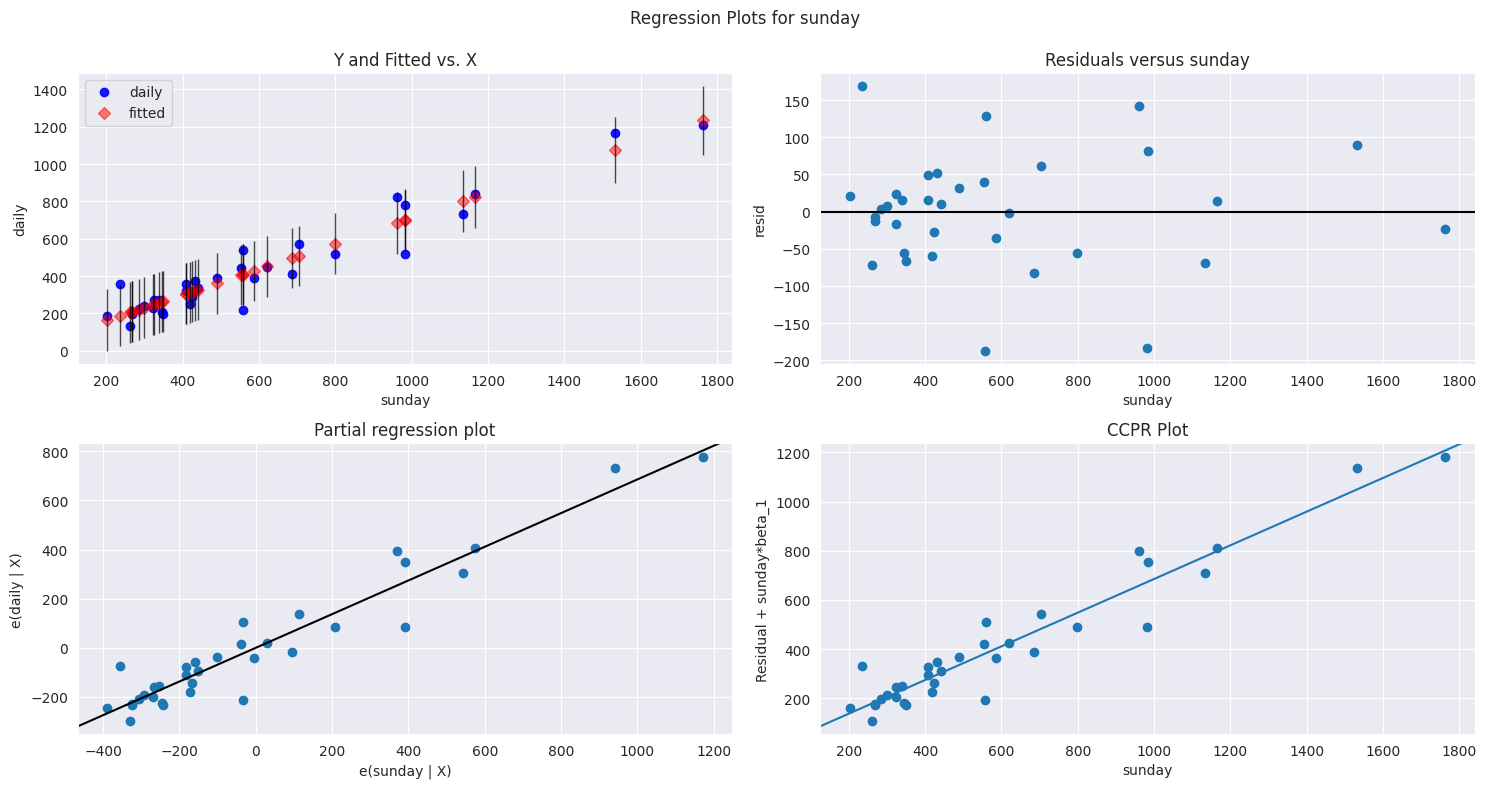

In [39]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'sunday', fig=fig)
plt.show()

In [35]:
import statsmodels.formula.api as smf
model = smf.ols('daily ~ sunday', data=newspaper).fit()

<Axes: xlabel='sunday', ylabel='daily'>

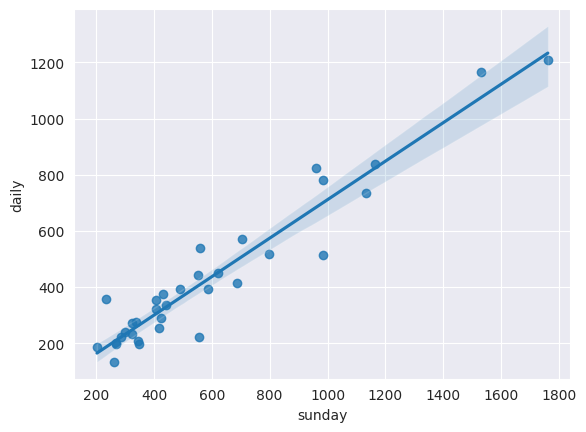

In [36]:
sns.regplot(x='sunday',y='daily',data=newspaper)

In [40]:

print(f"{model.rsquared * 100:.2f}%")


91.81%


In [43]:
newdata=pd.Series([200,300])

In [56]:
data_pred=pd.DataFrame(newdata,columns=['sunday'])

In [55]:
data_pred=pd.DataFrame(newdata,columns=['daily'])

In [62]:
final_ml_V = ml_v
final_ml_V.predict(newdata)
final_ml_V.predict(newspaper_new.iloc[0:5,])
pred_y = final_ml_V.predict(newspaper_new)

PatsyError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
Error evaluating factor: NameError: name 'sunday' is not defined
    daily~sunday
          ^^^^^^